<a href="https://colab.research.google.com/github/triasnugra/analisis/blob/main/modulsquality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from google.colab import files
import pandas as pd

# UPLOAADDDD
uploaded = files.upload()

# READ YAAAAAAAAAAA
file_name = list(uploaded.keys())[0]
data = pd.read_excel(file_name)

# Show Data PLZ
data


Saving data modul.xlsx to data modul (2).xlsx


,TUJUAN,TEMA,MATERI,TFP,WEB
0,5,5,4,3,3
1,5,5,4,3,3
2,5,5,3,1,2
3,4,4,2,1,1
4,5,5,2,1,1
5,5,5,3,2,2
6,5,4,2,1,1
7,4,4,2,1,2
8,5,5,3,1,3
9,5,4,2,1,1


In [19]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Fungsi untuk uji normalitas dengan interpretasi
def normalitas_test(data):
    p_values = {}
    interpretations = {}

    for column in data.columns:
        _, p_value = stats.shapiro(data[column])
        p_values[column] = p_value

        # Interpretasi berdasarkan nilai p
        if p_value > 0.05:
            interpretations[column] = "Data terdistribusi normal (gagal menolak H0)"
        else:
            interpretations[column] = "Data tidak terdistribusi normal (menolak H0)"

    return p_values, interpretations

# Melakukan uji normalitas pada semua kolom
normalitas_result, interpretasi_result = normalitas_test(data)

# Menampilkan hasil uji normalitas
normalitas_result, interpretasi_result


({'TUJUAN': 1.1453193396913662e-10,
  'TEMA': 1.885280919761604e-10,
  'MATERI': 1.8470616704498307e-07,
  'TFP': 1.37986450155731e-09,
  'WEB': 1.0970427588608206e-07},
 {'TUJUAN': 'Data tidak terdistribusi normal (menolak H0)',
  'TEMA': 'Data tidak terdistribusi normal (menolak H0)',
  'MATERI': 'Data tidak terdistribusi normal (menolak H0)',
  'TFP': 'Data tidak terdistribusi normal (menolak H0)',
  'WEB': 'Data tidak terdistribusi normal (menolak H0)'})

In [21]:
import scipy.stats as stats
import numpy as np

# Fungsi untuk uji normalitas dengan alternatif lain
def alternative_normalitas_test(data):
    p_values_ks = {}
    p_values_ad = {}
    interpretations_ks = {}
    interpretations_ad = {}
    ad_statistics = {}

    for column in data.columns:
        # Uji Kolmogorov-Smirnov
        _, p_value_ks = stats.kstest(data[column], 'norm', args=(np.mean(data[column]), np.std(data[column])))
        p_values_ks[column] = p_value_ks
        if p_value_ks > 0.05:
            interpretations_ks[column] = "Data terdistribusi normal (gagal menolak H0)"
        else:
            interpretations_ks[column] = "Data tidak terdistribusi normal (menolak H0)"

        # Uji Anderson-Darling
        result_ad = stats.anderson(data[column], dist='norm')
        ad_statistic = result_ad.statistic  # Statistik uji Anderson-Darling
        p_value_ad = result_ad.significance_level[2]  # Mengambil p-value untuk level 5%
        p_values_ad[column] = p_value_ad
        ad_statistics[column] = ad_statistic

        if p_value_ad > 0.05:
            interpretations_ad[column] = "Data terdistribusi normal (gagal menolak H0)"
        else:
            interpretations_ad[column] = "Data tidak terdistribusi normal (menolak H0)"

    return p_values_ks, interpretations_ks, p_values_ad, interpretations_ad, ad_statistics

# Melakukan uji normalitas alternatif pada semua kolom
p_values_ks, interpretations_ks, p_values_ad, interpretations_ad, ad_statistics = alternative_normalitas_test(data)

# Menampilkan hasil uji normalitas
p_values_ks, interpretations_ks, p_values_ad, interpretations_ad, ad_statistics


({'TUJUAN': 9.62940831108032e-09,
  'TEMA': 5.8347992781508727e-08,
  'MATERI': 0.0004258867549643621,
  'TFP': 6.005369576802016e-08,
  'WEB': 0.0011262504679590002},
 {'TUJUAN': 'Data tidak terdistribusi normal (menolak H0)',
  'TEMA': 'Data tidak terdistribusi normal (menolak H0)',
  'MATERI': 'Data tidak terdistribusi normal (menolak H0)',
  'TFP': 'Data tidak terdistribusi normal (menolak H0)',
  'WEB': 'Data tidak terdistribusi normal (menolak H0)'},
 {'TUJUAN': 5.0, 'TEMA': 5.0, 'MATERI': 5.0, 'TFP': 5.0, 'WEB': 5.0},
 {'TUJUAN': 'Data terdistribusi normal (gagal menolak H0)',
  'TEMA': 'Data terdistribusi normal (gagal menolak H0)',
  'MATERI': 'Data terdistribusi normal (gagal menolak H0)',
  'TFP': 'Data terdistribusi normal (gagal menolak H0)',
  'WEB': 'Data terdistribusi normal (gagal menolak H0)'},
 {'TUJUAN': 10.383519809872517,
  'TEMA': 9.908183051510562,
  'MATERI': 4.642676109158515,
  'TFP': 7.8181617733091215,
  'WEB': 4.816015616625123})

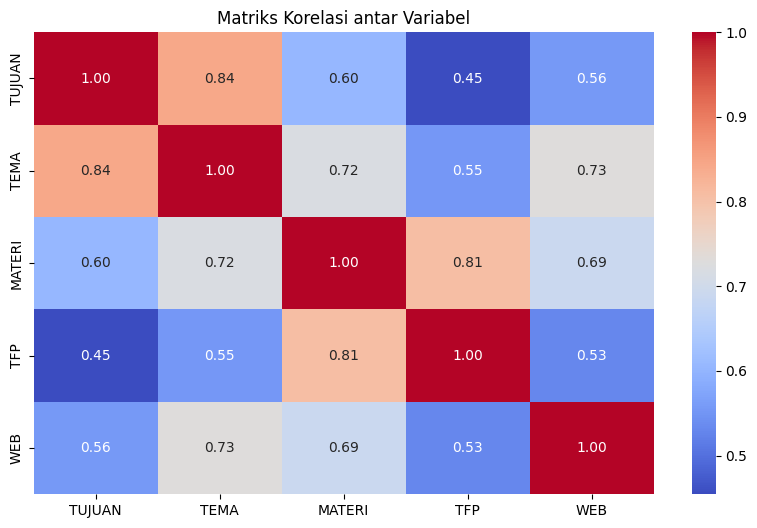

{('TUJUAN', 'TUJUAN'): 'Sangat kuat',
 ('TEMA', 'TUJUAN'): 'Sangat kuat',
 ('MATERI', 'TUJUAN'): 'Kuat',
 ('TFP', 'TUJUAN'): 'Sedang',
 ('WEB', 'TUJUAN'): 'Sedang',
 ('TUJUAN', 'TEMA'): 'Sangat kuat',
 ('TEMA', 'TEMA'): 'Sangat kuat',
 ('MATERI', 'TEMA'): 'Kuat',
 ('TFP', 'TEMA'): 'Sedang',
 ('WEB', 'TEMA'): 'Kuat',
 ('TUJUAN', 'MATERI'): 'Kuat',
 ('TEMA', 'MATERI'): 'Kuat',
 ('MATERI', 'MATERI'): 'Sangat kuat',
 ('TFP', 'MATERI'): 'Sangat kuat',
 ('WEB', 'MATERI'): 'Kuat',
 ('TUJUAN', 'TFP'): 'Sedang',
 ('TEMA', 'TFP'): 'Sedang',
 ('MATERI', 'TFP'): 'Sangat kuat',
 ('TFP', 'TFP'): 'Sangat kuat',
 ('WEB', 'TFP'): 'Sedang',
 ('TUJUAN', 'WEB'): 'Sedang',
 ('TEMA', 'WEB'): 'Kuat',
 ('MATERI', 'WEB'): 'Kuat',
 ('TFP', 'WEB'): 'Sedang',
 ('WEB', 'WEB'): 'Sangat kuat'}

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung matriks korelasi antar variabel
correlation_matrix = data.corr()

# Menampilkan heatmap korelasi
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi antar Variabel")
plt.show()

# Fungsi untuk interpretasi koefisien korelasi
def interpret_correlation(correlation_matrix):
    interpretations = {}
    for column in correlation_matrix.columns:
        for index in correlation_matrix.index:
            value = correlation_matrix.loc[index, column]
            if abs(value) < 0.20:
                interpretation = "Sangat lemah"
            elif abs(value) < 0.40:
                interpretation = "Lemah"
            elif abs(value) < 0.60:
                interpretation = "Sedang"
            elif abs(value) < 0.80:
                interpretation = "Kuat"
            else:
                interpretation = "Sangat kuat"

            interpretations[(index, column)] = interpretation
    return interpretations

# Menampilkan interpretasi korelasi
correlation_interpretation = interpret_correlation(correlation_matrix)

# Menampilkan hasil interpretasi korelasi
correlation_interpretation


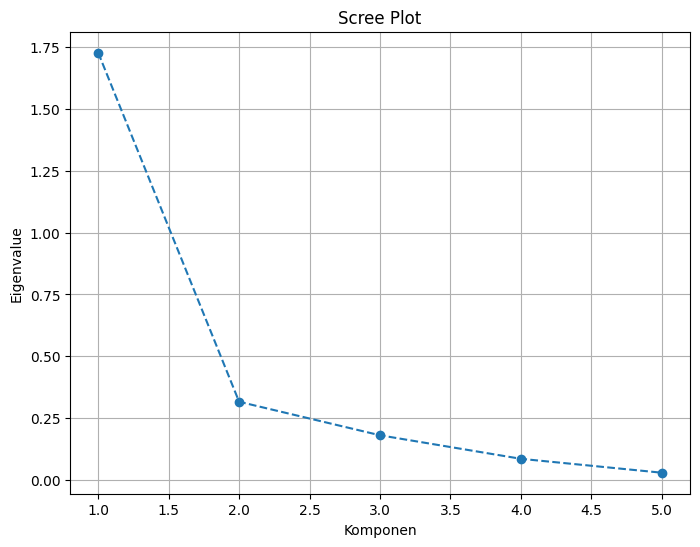

(array([1.72620406, 0.31629767, 0.1808957 , 0.08584089, 0.02965864]), 1)

In [25]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Menggunakan PCA untuk menghitung eigenvalue
pca = PCA()
pca.fit(data)

# Menampilkan eigenvalue (varians yang dijelaskan oleh setiap komponen)
eigenvalues = pca.explained_variance_

# Menampilkan jumlah komponen yang dipilih berdasarkan eigenvalue > 1
num_factors = np.sum(eigenvalues > 1)

# Visualisasi Scree Plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Komponen')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()

# Output eigenvalue dan interpretasi
eigenvalues, num_factors


In [29]:
from sklearn.decomposition import PCA
import pandas as pd

# Menentukan jumlah faktor berdasarkan eigenvalue > 1
num_factors = (eigenvalues > 1).sum()

# Ekstraksi faktor dengan jumlah faktor yang ditentukan
pca = PCA(n_components=num_factors)
factors = pca.fit_transform(data)

# Menampilkan faktor yang diekstraksi
factors_df = pd.DataFrame(factors, columns=[f"Factor {i+1}" for i in range(num_factors)])

# Menampilkan 5 baris pertama hasil ekstraksi faktor
factors_df.head()

# Interpretasi Faktor
def interpret_factors(pca, num_factors):
    interpretations = {}

    # Melihat komponen utama yang diekstraksi (loadings)
    component_loadings = pca.components_

    for i in range(num_factors):
        # Ambil loading komponen untuk faktor ke-i
        loading = component_loadings[i]

        # Interpretasi: Mengidentifikasi variabel yang paling berpengaruh pada faktor
        influential_variables = [data.columns[j] for j in range(len(loading)) if abs(loading[j]) > 0.5]

        # Menyusun interpretasi
        interpretations[f"Factor {i+1}"] = {
            "Explained Variance": pca.explained_variance_ratio_[i],
            "Influential Variables": influential_variables,
            "Loading Values": loading
        }

    return interpretations

# Mendapatkan interpretasi untuk faktor yang diekstraksi
factor_interpretations = interpret_factors(pca, num_factors)

# Menampilkan hasil interpretasi faktor
factor_interpretations


{'Factor 1': {'Explained Variance': 0.7380419464577437,
  'Influential Variables': ['MATERI', 'WEB'],
  'Loading Values': array([0.26364572, 0.31820934, 0.560306  , 0.43023794, 0.57461835])}}

**1. Explained Variance: 0.7380419464577437**

Makna: Faktor pertama menjelaskan sekitar 73.8% dari total varians yang ada dalam data. Ini menunjukkan bahwa Faktor 1 memiliki kontribusi yang besar dalam menggambarkan struktur data, karena semakin besar nilai varians yang dijelaskan, semakin penting faktor tersebut.

Interpretasi:
Faktor 1 adalah komponen utama yang paling signifikan dalam data Anda dan dapat dianggap sebagai dimensi utama yang menggerakkan sebagian besar variasi dalam data.

**2. Influential Variables: ['MATERI', 'WEB']**

Makna: Variabel-variabel yang paling berpengaruh dalam membentuk Faktor 1 adalah MATERI dan WEB.

Interpretasi:
Variabel-variabel ini memiliki pengaruh yang besar terhadap faktor ini. Dalam konteks modul ajar, ini bisa berarti bahwa kualitas Materi dan Web memainkan peran utama dalam menentukan faktor yang paling penting dalam varians data.

**3. Loading Values: array([0.26364572, 0.31820934, 0.560306 , 0.43023794, 0.57461835])**

Makna: Ini adalah nilai loading (beban) untuk setiap variabel dalam Faktor 1. Nilai-nilai ini menunjukkan kontribusi setiap variabel terhadap faktor yang diekstraksi.
MATERI (nilai loading: 0.2636)
WEB (nilai loading: 0.5746)
Variabel lainnya (nilai loading masing-masing: 0.3182, 0.5603, 0.4302)

Interpretasi:
Nilai loading yang lebih tinggi menunjukkan bahwa variabel tersebut memiliki kontribusi yang lebih besar terhadap faktor. Dalam hal ini, WEB memiliki pengaruh yang lebih besar pada Faktor 1 dibandingkan dengan variabel lainnya, yang terlihat dari nilai loading-nya yang paling tinggi (0.5746).
MATERI juga berkontribusi, tetapi dengan nilai loading yang lebih rendah (0.2636). Hal ini menunjukkan bahwa meskipun MATERI mempengaruhi faktor ini, pengaruhnya tidak sebesar WEB.

**Kesimpulan Umum:**

> Faktor 1 menjelaskan sebagian besar varians dalam data (73.8%), dan faktor ini sangat dipengaruhi oleh MATERI dan WEB.
WEB adalah variabel yang paling berpengaruh dalam faktor ini, sedangkan MATERI memiliki pengaruh yang lebih kecil namun tetap signifikan.
Dengan demikian, dalam analisis modul ajar atau skala penilaian lainnya, MATERI dan WEB mungkin menjadi dua aspek yang perlu mendapatkan perhatian lebih, karena keduanya memiliki kontribusi yang signifikan terhadap kualitas modul ajar secara keseluruhan.




In [47]:
# Menyusun interpretasi yang lebih deskriptif berdasarkan hasil PCA
def interpret_factors_with_description(pca, num_factors, data_columns):
    interpretations = {}
    descriptions = []  # Untuk menyimpan interpretasi deskriptif

    # Melihat komponen utama yang diekstraksi (loadings)
    component_loadings = pca.components_

    for i in range(num_factors):
        # Ambil loading komponen untuk faktor ke-i
        loading = component_loadings[i]

        # Identifikasi variabel dengan loading signifikan
        significant_variables = [(data_columns[j], loading[j]) for j in range(len(loading)) if abs(loading[j]) > 0.5]

        # Buat deskripsi interpretasi
        factor_description = f"Faktor {i+1} menjelaskan {pca.explained_variance_ratio_[i]:.2%} dari total varians."
        if significant_variables:
            factor_description += " Variabel yang memiliki pengaruh signifikan terhadap faktor ini meliputi:\n"
            for var, load in significant_variables:
                factor_description += f"  - **{var}** dengan loading sebesar {load:.2f}.\n"
        else:
            factor_description += " Tidak ada variabel dengan loading signifikan untuk faktor ini.\n"

        descriptions.append(factor_description)

        # Menyusun informasi untuk interpretasi rinci
        interpretations[f"Factor {i+1}"] = {
            "Explained Variance": pca.explained_variance_ratio_[i],
            "Significant Variables": [var for var, _ in significant_variables],
            "Loading Values": loading
        }

    return interpretations, descriptions


# Mendapatkan interpretasi untuk faktor yang diekstraksi
factor_interpretations, factor_descriptions = interpret_factors_with_description(pca, num_factors, data.columns)

# Menampilkan hasil interpretasi rinci
for factor, interpretation in factor_interpretations.items():
    print(f"{factor}:")
    print(f"  - Explained Variance: {interpretation['Explained Variance']:.4f}")
    print(f"  - Significant Variables: {', '.join(interpretation['Significant Variables'])}")
    print(f"  - Loading Values: {', '.join([f'{x:.4f}' for x in interpretation['Loading Values']])}")
    print("\n")

# Menampilkan deskripsi interpretasi
print("Interpretasi Deskriptif:\n")
for description in factor_descriptions:
    print(description)


Factor 1:
  - Explained Variance: 0.7380
  - Significant Variables: MATERI, WEB
  - Loading Values: 0.2636, 0.3182, 0.5603, 0.4302, 0.5746


Interpretasi Deskriptif:

Faktor 1 menjelaskan 73.80% dari total varians. Variabel yang memiliki pengaruh signifikan terhadap faktor ini meliputi:
  - **MATERI** dengan loading sebesar 0.56.
  - **WEB** dengan loading sebesar 0.57.

